In [1]:
from IPython.display import display

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)

In [2]:
df = pd.read_csv('DataChallenge/California_SO2_Measures.csv', parse_dates = ['Date'])
print('Set Memory Usage = {:.2f} MB'.format(df.memory_usage().sum() / 1024**2))
display(df)

Set Memory Usage = 0.64 MB


,Date,Source,Site ID,POC,Daily Max 1-hour SO2 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,2019-01-01,AQS,60010011,1,1.0,ppb,1,Oakland West,22,92.0,42401,Alameda,37.814781,-122.282347
1,2019-01-02,AQS,60010011,1,4.0,ppb,6,Oakland West,22,92.0,42401,Alameda,37.814781,-122.282347
2,2019-01-03,AQS,60010011,1,1.4,ppb,1,Oakland West,22,92.0,42401,Alameda,37.814781,-122.282347
3,2019-01-04,AQS,60010011,1,2.4,ppb,3,Oakland West,22,92.0,42401,Alameda,37.814781,-122.282347
4,2019-01-05,AQS,60010011,1,0.5,ppb,0,Oakland West,22,92.0,42401,Alameda,37.814781,-122.282347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5993,2019-10-25,AQS,60950004,1,1.7,ppb,1,Vallejo,22,92.0,42401,Solano,38.102507,-122.237976
5994,2019-10-26,AQS,60950004,1,2.4,ppb,3,Vallejo,22,92.0,42401,Solano,38.102507,-122.237976
5995,2019-10-29,AQS,60950004,1,2.0,ppb,3,Vallejo,22,92.0,42401,Solano,38.102507,-122.237976
5996,2019-10-30,AQS,60950004,1,1.4,ppb,1,Vallejo,22,92.0,42401,Solano,38.102507,-122.237976


In [16]:
df.dtypes

Source                                 object
Site ID                                 int64
POC                                     int64
Daily Max 1-hour SO2 Concentration    float64
UNITS                                  object
DAILY_AQI_VALUE                         int64
Site Name                              object
DAILY_OBS_COUNT                         int64
PERCENT_COMPLETE                      float64
AQS_PARAMETER_CODE                      int64
COUNTY                                 object
SITE_LATITUDE                         float64
SITE_LONGITUDE                        float64
dtype: object

| Feature | Description|
| --- | --- |
| Date | Date of the Observation |
| --- | --- |
| Source | Source of the data |
| --- | --- |
| Site ID | ID of the site |
| --- | --- |
| POC | Parameter Occurence Code(convenient method for tracking multiple measurements of a single parameter at one site.) |
| --- | --- |
| Daily Max 1-hour SO2 Concentration | Daily Max 1-hour SO2 Concentration |
| --- | --- |
| UNITS | Unit of Measurement eg ppm,ppb |
| --- | --- |
| DAILY_AQI_VALUE | Air quality index value (daily sampled) |
| --- | --- |
| Site Name | Name of the site |
| --- | --- |
| DAILY_OBS_COUNT | Number of daily Observation taken |
| --- | --- |
| PERCENT_COMPLETE | (not known) |
| --- | --- |
| AQS_PARAMETER_CODE | AQS Parameter Code (Internal) |
| --- | --- |
| COUNTY | The Observed County |
| --- | --- |
| SITE_LATITUDE/LONGITUDE | Site's location coordinates|

# First Impressions of the Dataset

- <font size='3'>The Data is ***Sampled Daily***
- <font size='3'>The data contains Observations from 15 **Counties** and different **Sites** in them (the observatories) denoted by **SiteID**.
- <font size='3'>This data belongs to central repository of **Air Quality System** (source) 
- <font size='3'>Observation are measured on **ppb scale** (parts per billion)
- <font size='3'>Alongwith **Daily Concentration of So2** other timeseries feature given is the **AQI**

In [174]:
def draw_missing_data_table(df):
    '''
    Docstring: Returns a datarframe with percent of missing/nan values per feature/column
    
    Parameters:
    ------------
    df: dataframe object
    
    Returns:
    ------------
    Dataframe containing missing value information
    '''
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent of NaNs'])
    return missing_data

In [5]:
draw_missing_data_table(df)

,Total,Percent of NaNs
SITE_LONGITUDE,0,0.0
SITE_LATITUDE,0,0.0
COUNTY,0,0.0
AQS_PARAMETER_CODE,0,0.0
PERCENT_COMPLETE,0,0.0
DAILY_OBS_COUNT,0,0.0
Site Name,0,0.0
DAILY_AQI_VALUE,0,0.0
UNITS,0,0.0
Daily Max 1-hour SO2 Concentration,0,0.0


- <font size="3">Source has nothing to do with So2 concentration and AQI values
- <font size="3">SiteID also contributes nothing to So2 concentration
- <font size="3">Since County has been given, there seems no need for latitude and longitude

In [7]:
print(df.UNITS.unique())
print(df.Source.unique())

['ppb']
['AQS']


In [3]:
df.drop(['Source','UNITS','Site ID','AQS_PARAMETER_CODE','SITE_LONGITUDE','SITE_LATITUDE'],axis=1,inplace=True)

In [4]:
df

,Date,POC,Daily Max 1-hour SO2 Concentration,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,COUNTY
0,2019-01-01,1,1.0,1,Oakland West,22,92.0,Alameda
1,2019-01-02,1,4.0,6,Oakland West,22,92.0,Alameda
2,2019-01-03,1,1.4,1,Oakland West,22,92.0,Alameda
3,2019-01-04,1,2.4,3,Oakland West,22,92.0,Alameda
4,2019-01-05,1,0.5,0,Oakland West,22,92.0,Alameda
...,...,...,...,...,...,...,...,...
5993,2019-10-25,1,1.7,1,Vallejo,22,92.0,Solano
5994,2019-10-26,1,2.4,3,Vallejo,22,92.0,Solano
5995,2019-10-29,1,2.0,3,Vallejo,22,92.0,Solano
5996,2019-10-30,1,1.4,1,Vallejo,22,92.0,Solano


In [23]:
df['DAILY_OBS_COUNT'].value_counts()

23    2689
24    1486
22    1061
21     518
20     127
19      76
18      41
Name: DAILY_OBS_COUNT, dtype: int64

Text(0, 0.5, 'Count')

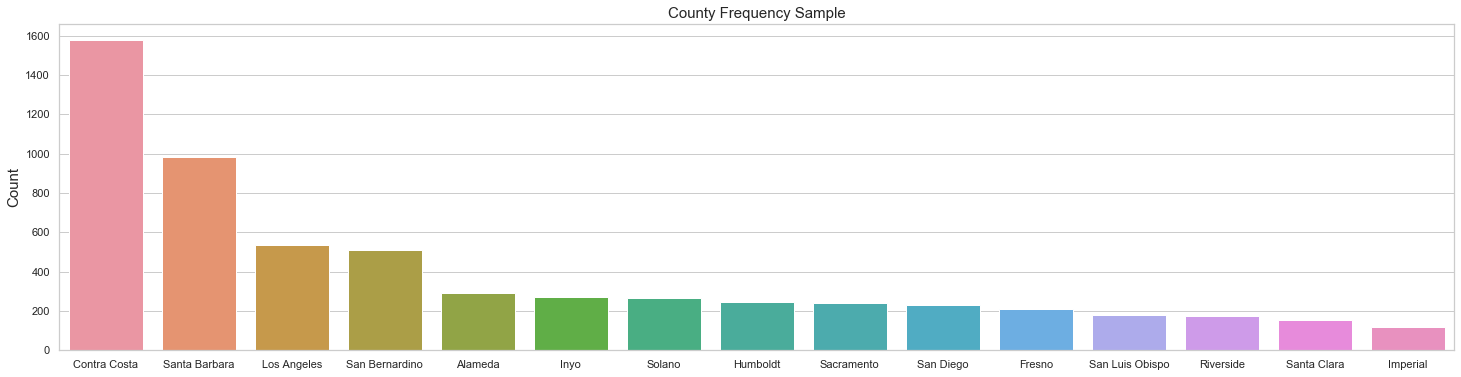

In [12]:
fig, ax = plt.subplots(figsize=(25, 6))

sns.barplot(x=df['COUNTY'].value_counts().index,y=df['COUNTY'].value_counts(),ax=ax,capsize=.2)

ax.set_title('County Frequency Sample', fontsize=15)
ax.set_ylabel('Count',fontsize=15)

- <font size="3">Most of the observations belong to ```Contra Costa```, ```Santa Barbara``` and ```San Bernadino``` (top 3) 

Text(0, 0.5, 'Count')

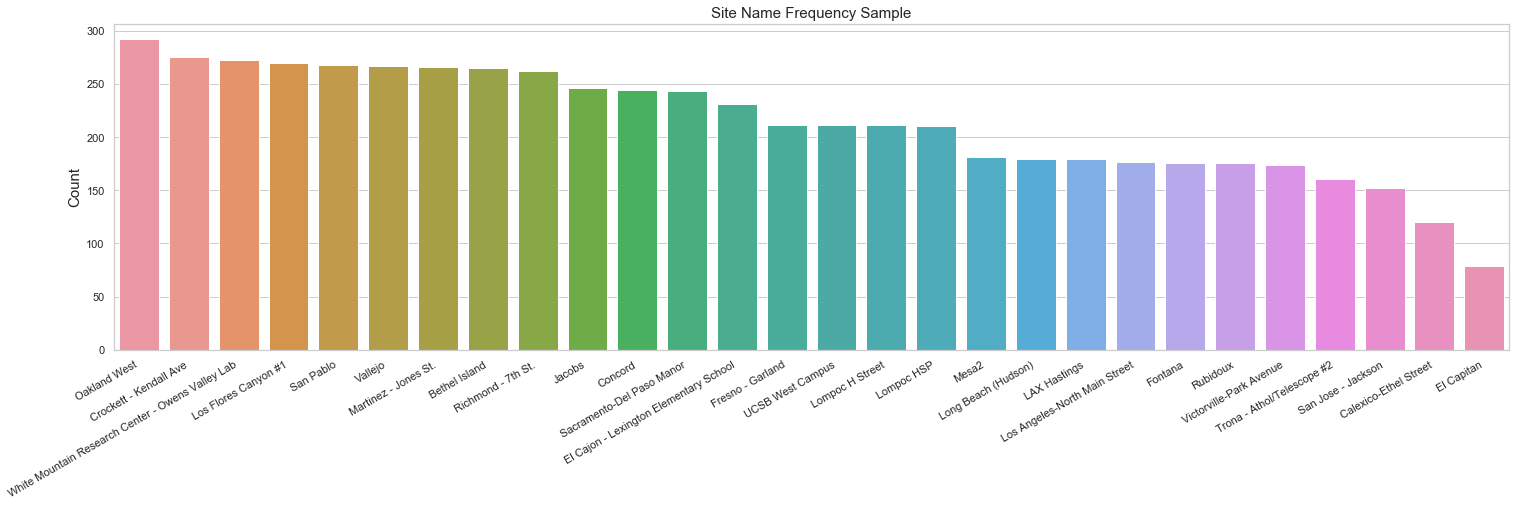

In [13]:
fig, ax = plt.subplots(figsize=(25, 6))

sns.barplot(x=df['Site Name'].value_counts().index,y=df['Site Name'].value_counts(),ax=ax,capsize=.2)

ax.set_title('Site Name Frequency Sample', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
ax.set_ylabel('Count',fontsize=15)

<font size="3"> ```Oakland West``` reports more frequently than any other site in the Dataset

Text(0.5, 1.0, 'Average Daily Max 1-hour SO2 Concentration for observed Counties')

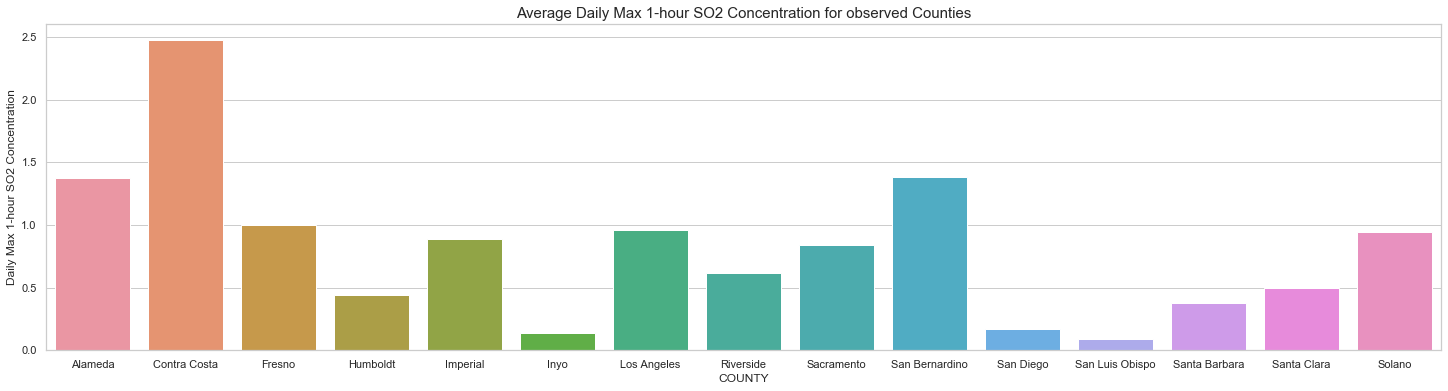

In [11]:
fig, ax = plt.subplots(figsize=(25, 6))

sns.barplot(x="COUNTY",
            y='Daily Max 1-hour SO2 Concentration', 
            data= df.groupby(['COUNTY'] ,as_index=False)['Daily Max 1-hour SO2 Concentration'].mean(),
            ax=ax,
            capsize=.2)
ax.set_title('Average Daily Max 1-hour SO2 Concentration for observed Counties', fontsize=15)

<font size="3"> Looking Statically at the observed Window (from 1-1-19:31-10-19) ```Contra Costa County``` reports **highest levels of Average So2 Concentration**

---

# Trend Analysis of Daily So2 concentration

In [9]:
df

,Date,POC,Daily Max 1-hour SO2 Concentration,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,COUNTY
0,2019-01-01,1,1.0,1,Oakland West,22,92.0,Alameda
1,2019-01-02,1,4.0,6,Oakland West,22,92.0,Alameda
2,2019-01-03,1,1.4,1,Oakland West,22,92.0,Alameda
3,2019-01-04,1,2.4,3,Oakland West,22,92.0,Alameda
4,2019-01-05,1,0.5,0,Oakland West,22,92.0,Alameda
...,...,...,...,...,...,...,...,...
5993,2019-10-25,1,1.7,1,Vallejo,22,92.0,Solano
5994,2019-10-26,1,2.4,3,Vallejo,22,92.0,Solano
5995,2019-10-29,1,2.0,3,Vallejo,22,92.0,Solano
5996,2019-10-30,1,1.4,1,Vallejo,22,92.0,Solano


- <font size="3">The timeline is different for every County since the observation taken on a single day belongs to a specific county and site name
- <font size="3">Since the Timeline of each County is different we're gonna need different scales on the y-axis to visualize the timeseries trends in So2 concentration

In [44]:
df.loc[df.Date==pd.to_datetime("2019-10-22")]

,Date,POC,Daily Max 1-hour SO2 Concentration,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,COUNTY
288,2019-10-22,1,2.8,3,Oakland West,19,79.0,Alameda
788,2019-10-22,1,5.0,7,Richmond - 7th St.,23,96.0,Contra Costa
1063,2019-10-22,1,5.1,7,Crockett - Kendall Ave,23,96.0,Contra Costa
1333,2019-10-22,1,0.5,0,Bethel Island,22,92.0,Contra Costa
1596,2019-10-22,1,2.0,3,San Pablo,23,96.0,Contra Costa
1862,2019-10-22,1,4.7,6,Martinez - Jones St.,23,96.0,Contra Costa
5991,2019-10-22,1,3.4,4,Vallejo,22,92.0,Solano


- <font size="3"> We cannot visualize the change in So2 concentration just by plotting the data. Since at a particular date multiple readings from a county and site are recorded. What we do here is visualize the change in So2 concentration by county and for a particular county see the changes in sites where the reading is recorded.

In [52]:
pd.set_option('display.max_rows', 28)
display(df.pivot_table(index=['COUNTY','Site Name']))
pd.set_option('display.max_rows', 10)

DAILY_AQI_VALUE  DAILY_OBS_COUNT  Daily Max 1-hour SO2 Concentration  PERCENT_COMPLETE  POC
COUNTY          Site Name                                                                                                                                     
Alameda         Oakland West                                              1.260274        21.835616                            1.372945         91.287671    1
Contra Costa    Bethel Island                                             1.498113        21.894340                            1.849811         91.543396    1
                Concord                                                   2.573770        22.856557                            3.817623         95.418033    1
                Crockett - Kendall Ave                                    2.920000        22.930909                            2.612727         95.712727    1
                Martinez - Jones St.                                      3.248120        22.872180                            2.830827         95.462406    1
                Richmond - 7th St.                                        2.515267        22.641221                            2.280534         94.530534    1
                San Pablo                                                 1.477612        22.869403                            1.583209         95.458955    1
Fresno          Fresno - Garland                                          0.876777        23.838863                            1.001422         99.350711    3
Humboldt        Jacobs                                                    0.004065        22.471545                            0.443902         93.731707    1
Imperial        Calexico-Ethel Street                                     0.641667        22.950000                            0.890000         95.775000    3
Inyo            White Mountain Research Center - Owens Valley Lab         0.000000        23.308824                            0.138971         97.224265    1
Los Angeles     LAX Hastings                                              0.525140        23.720670                            0.853631         98.854749    1
                Long Beach (Hudson)                                       1.413408        23.687151                            1.518994         98.709497    1
                Los Angeles-North Main Street                             0.186441        23.734463                            0.494915         98.909605    9
Riverside       Rubidoux                                                  0.142045        23.914773                            0.615909         99.659091    9
Sacramento      Sacramento-Del Paso Manor                                 0.497942        23.238683                            0.837449         96.934156    1
San Bernardino  Fontana                                                   0.181818        23.619318                            0.624432         98.420455    1
                Trona - Athol/Telescope #2                                1.987578        22.757764                            1.975776         94.981366    1
                Victorville-Park Avenue                                   1.431034        22.839080                            1.609195         95.321839    1
San Diego       El Cajon - Lexington Elementary School                    0.000000        20.956710                            0.168398         87.701299    1
San Luis Obispo Mesa2                                                     0.093923        22.917127                            0.093923         95.668508    1
Santa Barbara   El Capitan                                                0.025316        22.518987                            0.025316         94.000000    1
                Lompoc H Street                                           1.995261        22.625592                            1.502370         94.450237    1
                Lompoc HSP                                                0.071429        22

### So2 when Sampled Daily,visualized

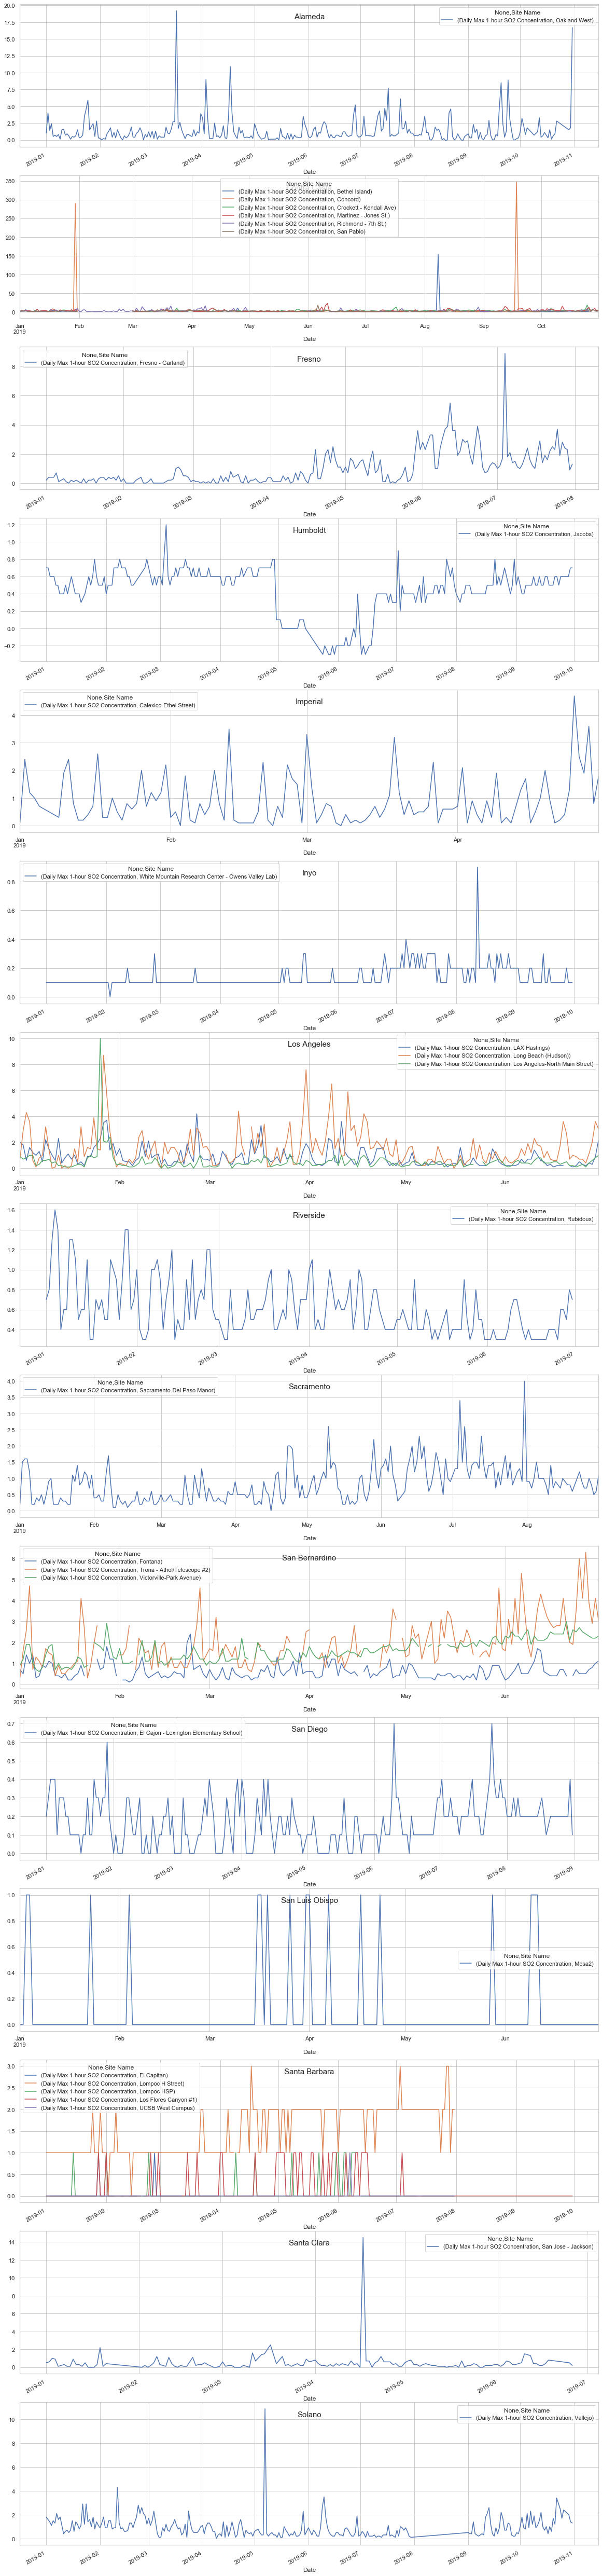

In [163]:
COUNTIES = df.COUNTY.unique()

fig, ax = plt.subplots(nrows=int(len(COUNTIES)),figsize=(20, 100))

for i,county in enumerate(COUNTIES):
    t = df[['Date','Daily Max 1-hour SO2 Concentration','Site Name']].loc[df.COUNTY==county]
    pt = t.pivot_table(index=['Date'],columns=['Site Name'],values=['Daily Max 1-hour SO2 Concentration'])
    
    pt.plot(ax=ax[i])

    ax[i].text(.5,.9,county,
        horizontalalignment='center',
        transform=ax[i].transAxes,fontsize=15)

# Interpretations of the above Sub-plots by County

- <font size="3">```Alameda County```: Oakland West was the single site name in this county. Daily So2 concentrations in the county varies vividly. The county sees local maxima at the end of every month except for the months of April and September, where we see two sudden spikes of significant magnitude. The So2 concentration saw global maxima in March. A possible reason could be increased vehicular movement due to some sort of festival or event happening in the city. As we saw major sources of So2 include IC vehicles, petrol refineries, and chemical factories.
    
- <font size="3">```Contra Costa```: The So2 activity in this county is monitored by 6 different sites namely Bethel Island, Concord, Crockett, Martinez, Richmond, San Pablo. Concord area sees a spike in the concentration in late January and mid-September, Bethel Island sees a spike in the 1st week of August. All other sites report concentration to be close to 0, which signifies excellent air quality with little or no sign of sulfur in the air.
 
- <font size="3">```Fresno``` - This county only has a single site, Garland. It reports fairly similar behavior in the concentration till mid-April and after that, the trend is increasing linearly with numerous local maximas and global maxima at the start of July.
    
- <font size="3">```Humboldt``` - Jacobs is the only site reporting the concentration of So2. It reports ~0.5 till the month of April with few curves between. Starting May it drops substantially and gets below 0 till mid of June. This behavior is a likely cause of mass activity that took place in the county, like vacations or refineries coming to a halt.
    
- <font size="3">```Imperial``` - Calexico Ethel-street is the sole site in this county where the observations are made. The trend here is quite flat and troughs and crests occur in every month observed.
    
- <font size="3">```Inyo``` - Owens Valley Lab sees a pretty flat line till June and sudden spike in the concentration in mid-August, post that it goes to the original flat line estimate
    
- <font size="3">```Los Angeles``` - 3 sites report the So2 concentration in Los Angeles: Hastings, Long Beach, and North-Main Street. All three of the sites report a sharp spike towards the end of January. Long Beach shows more So2 activity with again spiking at March-end and in multiple days of April. So2 activity fades out after May-June.
    
- <font size="3">```Riverside``` - Rubidoux is the sole site in this county where the observations are made. The trend here is quite flat and troughs and crests occur in every month observed.
    
- <font size="3">```Sacramento```- Only one site reports the So2 concentration activity in the county which is Sacramento-Del Paso Manor. It varies quite similarly with troughs and crests, stretching till May. After that, the trend tends to increase linearly with more local maxima getting a global maxima at the end of July. After July, due to less activity the slope decreases.
    
- <font size="3">```San Bernadino```- Fontana, Trona, Victorville. We can see breakpoints in the observation that's because the readings weren't taken for that missing time frame for a particular datum. Fontana sees a flat trend throughout the observations while Victorville sees a linear slope increasing trend. Trona, however, observed regular sharp spikes throughout with an increasing trend.  

<font size="3"> Lets also look at the plot when sampled Monthly.

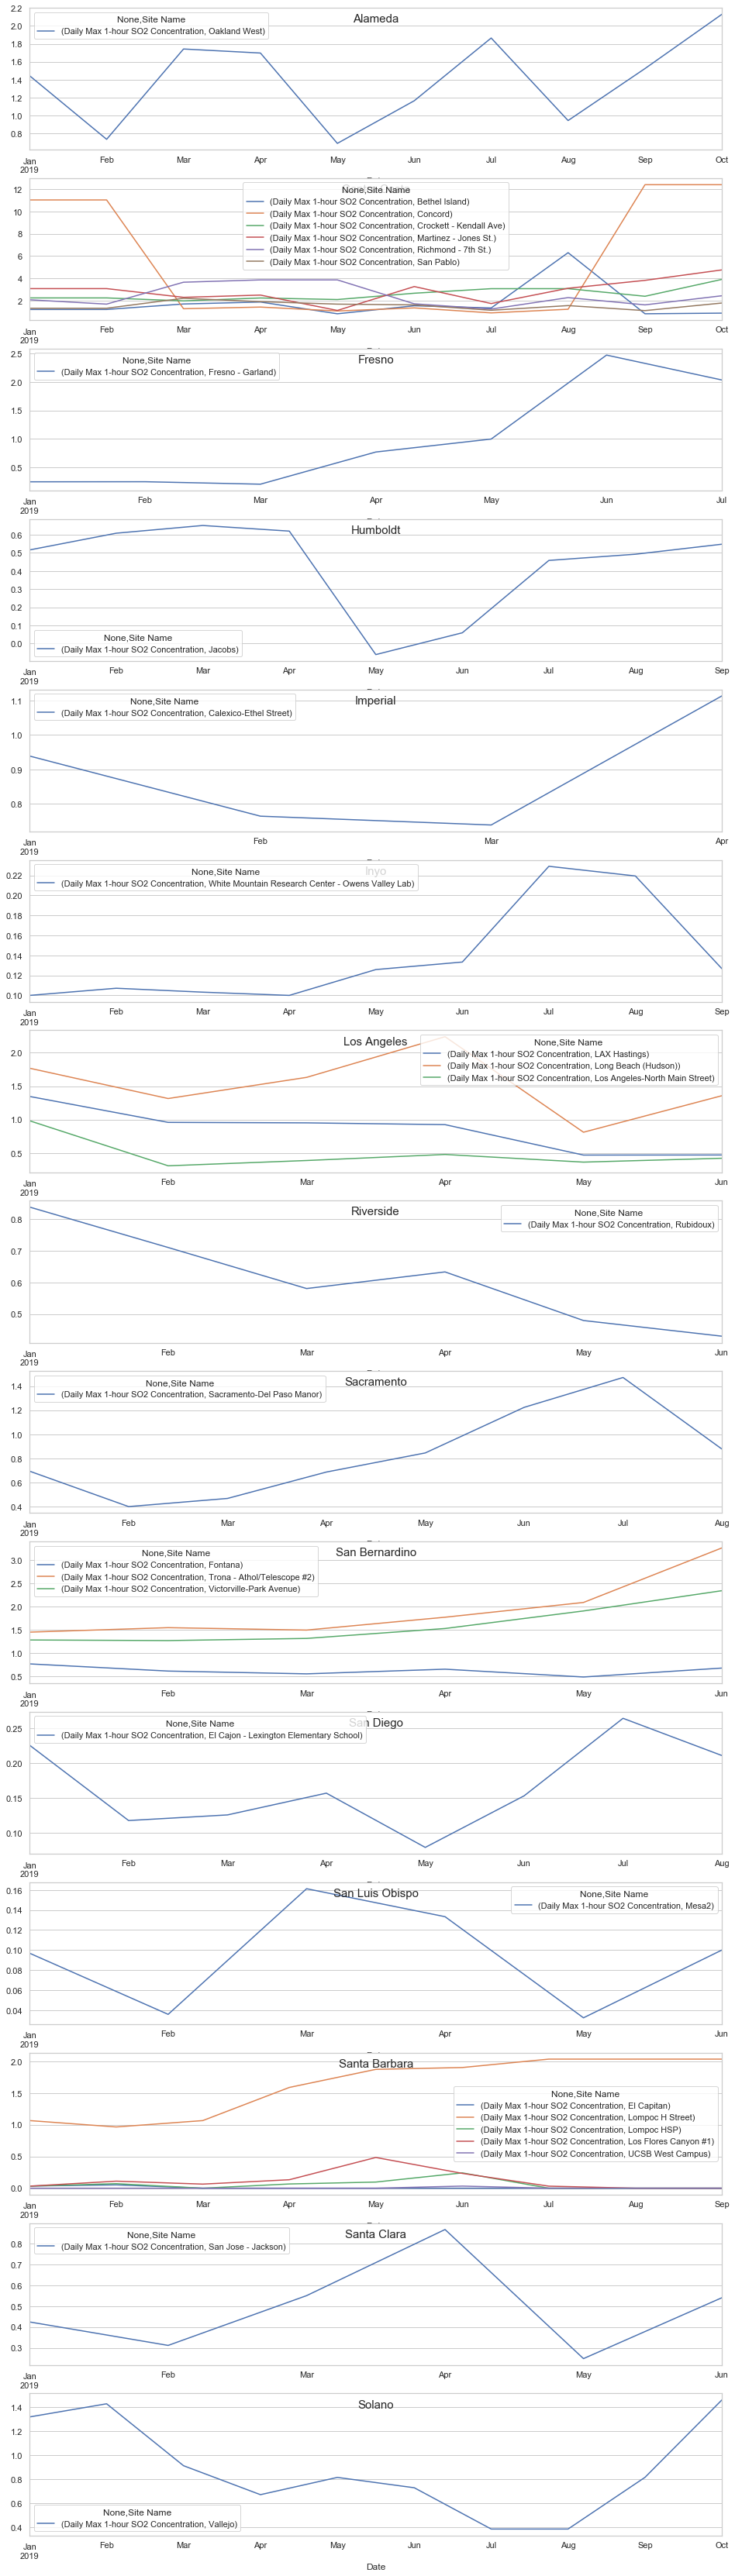

In [161]:
COUNTIES = df.COUNTY.unique()

fig, ax = plt.subplots(nrows=int(len(COUNTIES)),figsize=(16, 60))

for i,county in enumerate(COUNTIES):
    t = df[['Date','Daily Max 1-hour SO2 Concentration','Site Name']].loc[df.COUNTY==county]
    pt = t.pivot_table(index=['Date'],columns=['Site Name'],values=['Daily Max 1-hour SO2 Concentration'])
    pt = pt.resample(rule = "M").mean().ffill()
    pt.plot(ax=ax[i])
    
    #ax[i].set_title(county, fontsize=25)
    ax[i].text(.5,.9,county,
        horizontalalignment='center',
        transform=ax[i].transAxes,fontsize=15)

<font size="3"> With low Resolution we can see the overall trend exhibited by each county and site over the the months. This help us to analyze which months had more Concentration and devise out probable reasons according to that (like Vehicular Pollution, Chemical Factors, Industries)

---

# Sacramento County

In [96]:
sacramento = df.loc[df['COUNTY']=='Sacramento']
sacramento

,Date,POC,Daily Max 1-hour SO2 Concentration,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,COUNTY
3432,2019-01-01,1,0.2,0,Sacramento-Del Paso Manor,24,100.0,Sacramento
3433,2019-01-02,1,1.5,1,Sacramento-Del Paso Manor,24,100.0,Sacramento
3434,2019-01-03,1,1.6,1,Sacramento-Del Paso Manor,24,100.0,Sacramento
3435,2019-01-04,1,1.6,1,Sacramento-Del Paso Manor,22,92.0,Sacramento
3436,2019-01-05,1,1.2,1,Sacramento-Del Paso Manor,24,100.0,Sacramento
...,...,...,...,...,...,...,...,...
3670,2019-08-27,1,1.0,1,Sacramento-Del Paso Manor,24,100.0,Sacramento
3671,2019-08-28,1,0.8,0,Sacramento-Del Paso Manor,24,100.0,Sacramento
3672,2019-08-29,1,0.5,0,Sacramento-Del Paso Manor,22,92.0,Sacramento
3673,2019-08-30,1,0.6,0,Sacramento-Del Paso Manor,24,100.0,Sacramento


<font size="3">Since there's only one Site in the Sacramento County, I'll drop county and site name from the dataframe above

In [97]:
sacramento.drop(['COUNTY','Site Name'],axis=1,inplace=True)
sacramento.set_index('Date',inplace=True)

In [98]:
t = sacramento[['Daily Max 1-hour SO2 Concentration','DAILY_AQI_VALUE']]

Text(0, 0.5, 'Concentration')

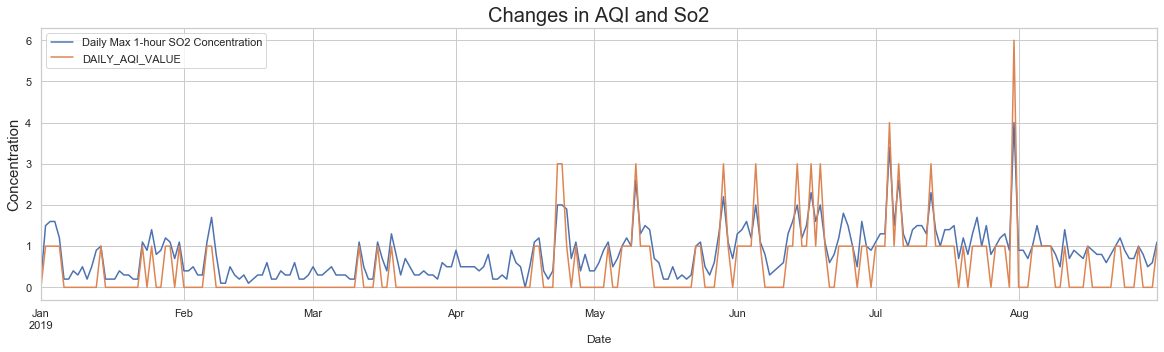

In [99]:
fig, ax = plt.subplots(figsize=(20, 5))

t.plot(ax=ax)
ax.set_title('Changes in AQI and So2',fontsize=20)
ax.set_ylabel('Concentration',fontsize=15)

- <font size="3"> We can observe here that the spikes and distribution of the change in So2 concentration closely matches with the changes in Air quality. This is a plausible effect. Let's see a correlation between AQI and So2 concentration

In [100]:
t.corr(method='pearson')

,Daily Max 1-hour SO2 Concentration,DAILY_AQI_VALUE
Daily Max 1-hour SO2 Concentration,1.000000,0.904084
DAILY_AQI_VALUE,0.904084,1.000000


<font size="3">We can surely see a **string positive correlation** between AQI and So2 concentrations. Since the date object is sorted we can see a relationship between the two using a lineplot.

In [101]:
t = t.resample(rule = "M").mean().ffill()

Text(0, 0.5, 'Concentration')

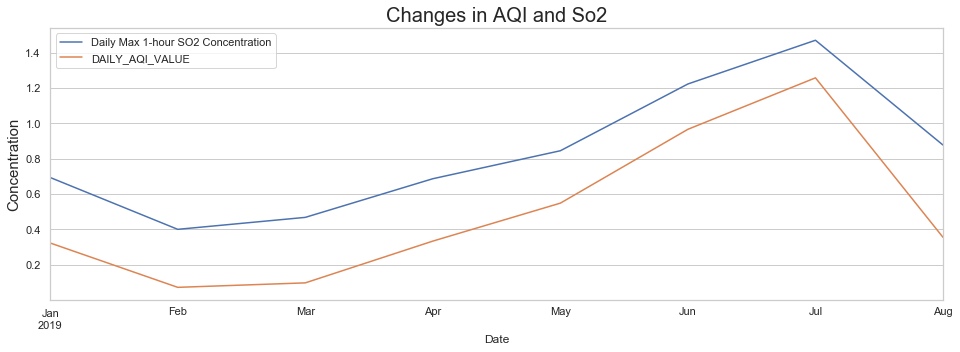

In [102]:
fig, ax = plt.subplots(figsize=(16, 5))

#t = sacramento[['Daily Max 1-hour SO2 Concentration','DAILY_AQI_VALUE']]
t.plot(ax=ax)
ax.set_title('Changes in AQI and So2',fontsize=20)
ax.set_ylabel('Concentration',fontsize=15)

### ETS (Error-Trend-Seasonality) Decompose

In [103]:
from statsmodels.tsa.seasonal import seasonal_decompose

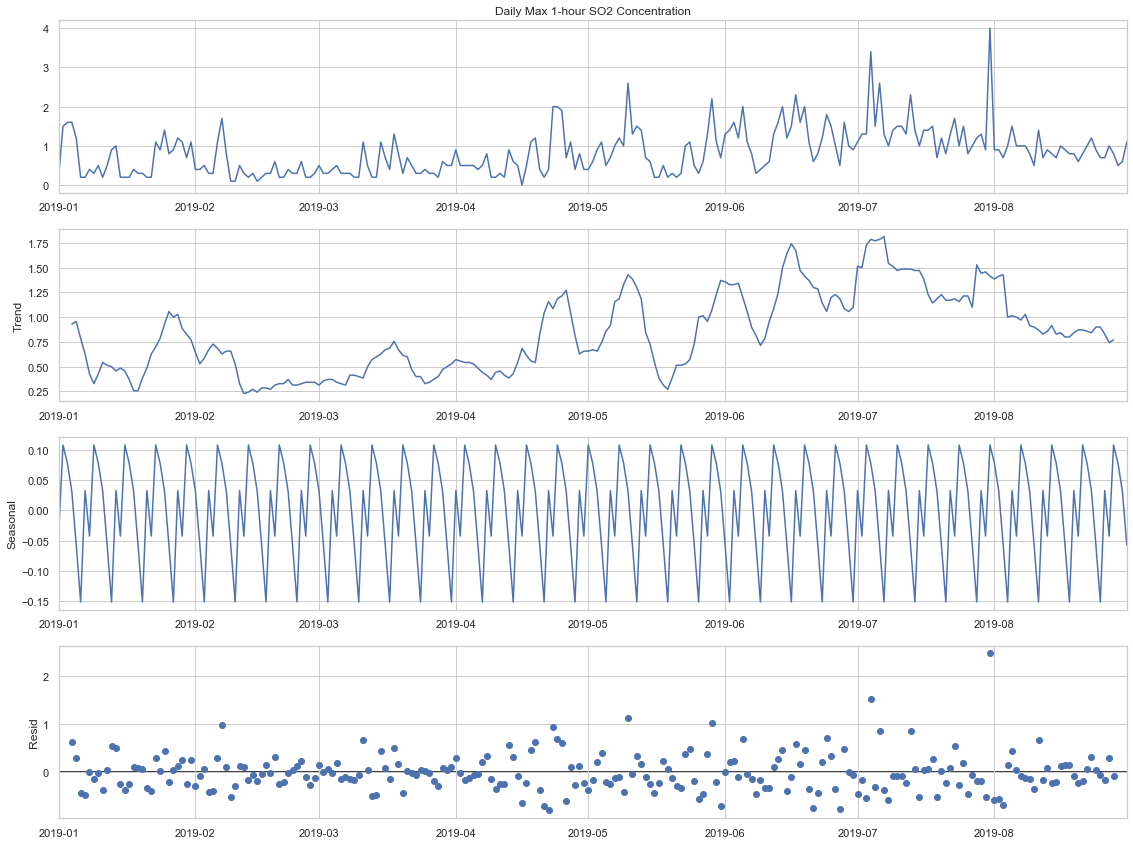

In [104]:
plt.rc('figure',figsize=(16,12))
plt.rc('font',size=15)

result = seasonal_decompose(sacramento['Daily Max 1-hour SO2 Concentration'],model='additive')
fig = result.plot()

In [105]:
seasonally_adjusted = result.observed-result.seasonal

<font size="3">Seasonally adjusted series contain the remainder component as well as the trend-cycle. Therefore, they are not “smooth”, and “downturns” or “upturns” can be misleading. If the purpose is to look for turning points in a series, and interpret any changes in direction, then it is better to use the trend-cycle component rather than the seasonally adjusted data.

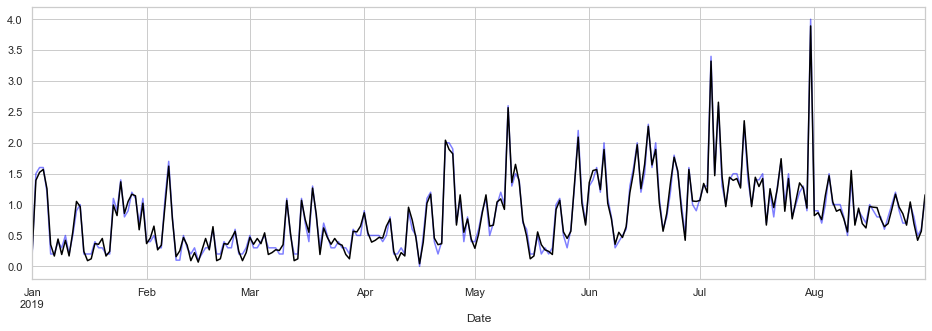

In [108]:
plt.rc('figure',figsize=(16,5))
plt.rc('font',size=15)

result.observed.plot(color=['blue'],alpha=0.5)
seasonally_adjusted.plot(color=['black'])

<font size="3"> We can see here that orginal observations and Seasonally adjusted one's are similar, which can be explained by the fact that we doesn't have much date (multiple years) to actually see seasonality change.

## Check for stationarity - Augmented Dickey-Fuller test

<font size="3">The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

<font size="3">The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

<font size="3">There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

<font size="3">The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

<font size="3">Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
<font size="3">Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
<font size="3">We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

- <font size="3">**p-value > 0.05**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- <font size="3">**p-value <= 0.05**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [54]:
from statsmodels.tsa.stattools import adfuller

In [98]:
def adf_check(timeseries):
    
    result = adfuller(timeseries)
    print('Augmented Dickey Fuller Test')
    labels = ['ADF test statistic','p-value','# of lags','No. of obs used']
    
    for value,label in zip(result,labels):
        print(label+" : "+str(value))
        
    if result[1] <= 0.05:
        print('String evidence against null hypothesis')
        print('Reject null hypothesis')
        print('Data has no Unit root and is Stationary')
        
    else:
        print('Weak evidence against null hypothesis')
        print('Fail to reject null hypothesis')
        print('Data has a unit root, it is not stationary')

In [99]:
adf_check(sacramento['Daily Max 1-hour SO2 Concentration'])

Augmented Dickey Fuller Test
ADF test statistic : -3.9166719864325494
p-value : 0.001915519505146156
# of lags : 4
No. of obs used : 238
String evidence against null hypothesis
Reject null hypothesis
Data has no Unit root and is Stationary


<font size="3">Since p<0.05 We reject the H0 and the Timeseries is Stationary. Time series are stationary if they do not have trend or seasonal effects so we can proceed with this finding

## Autocorrelation

<font size="3"> From autocorrelation we can see the correlation of a partcular timestep with the previous timesteps followed. This will help us analyze if on a particular day the reading closely resemble to the day before

In [57]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

Concave shade is the Confidence Interval~95%


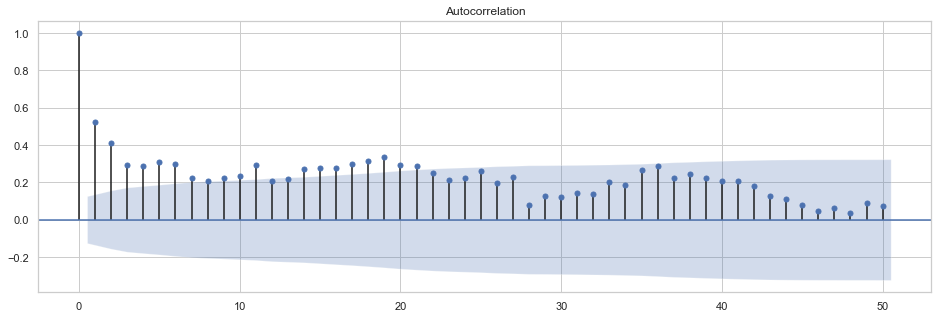

In [61]:
acf = plot_acf(sacramento['Daily Max 1-hour SO2 Concentration'], lags=50)
print("Concave shade is the Confidence Interval~95%")

<font size="3">As per above plot we have good correlation upto 6th lag, this is the lag after which plot cuts the upper confidence interval. Order q of series obtained by the plot is 6, which is correct as we had defined our series with linear combination of residuals upto lag 6.
Thus this proves that ACF correctly predicted order of our MA(6) series.

<font size="3"> This clearly means the reading stay correlated upto 6 days (and highly correlated upto 2 days)

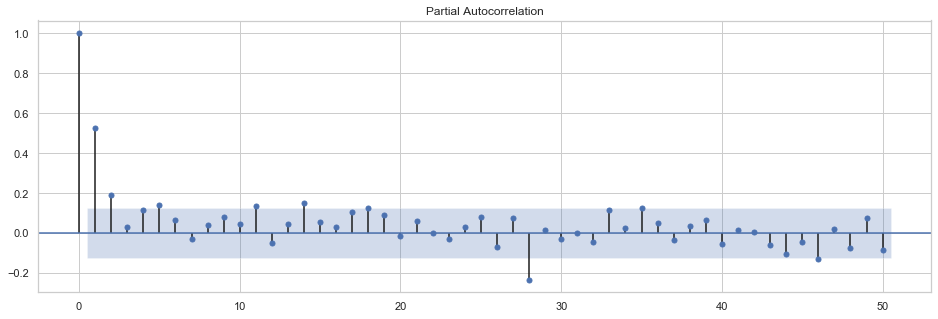

In [59]:
pacf = plot_pacf(sacramento['Daily Max 1-hour SO2 Concentration'], lags=50)

<font size="3">If we see PACF plot there are many instances where correlation is above upper confidence band as PACF calculates correlations of lags of time series with residuals and our series itself is linear combination of residual and its lagged values.Hence we can get good correlation for near as well as past lags.

---

# Outlier Detection

- <font size="3"> Outliers are sudden changes in the dataset (timeseries) which probably weren't part of the distribution and their Likelihood is small. If they exists in large quantities (not larger than the observed data) then they hamper the predictions and in-turn the model.
- <font size="3"> So its best to identify outliers and remove them before they create havoc in Modelling process

In [141]:
from fbprophet import Prophet
from pandas.tseries.offsets import DateOffset

In [142]:
pt = df.loc[df['COUNTY']=='Sacramento']

In [143]:
t = pd.DataFrame()
t['ds'] = pt['Date']
t['y'] = pt['Daily Max 1-hour SO2 Concentration']

In [144]:
t.reset_index(inplace=True,drop=True)
t.set_index('ds',inplace=True)

In [145]:
future_dates = [t.index[-1] + DateOffset(days=x) for x in range(1,14)] #adding 14 days(2 weeks) to the dataset

In [146]:
t.tail()

,y
ds,
2019-08-27,1.0
2019-08-28,0.8
2019-08-29,0.5
2019-08-30,0.6
2019-08-31,1.1


In [147]:
future_dates

[Timestamp('2019-09-01 00:00:00'),
 Timestamp('2019-09-02 00:00:00'),
 Timestamp('2019-09-03 00:00:00'),
 Timestamp('2019-09-04 00:00:00'),
 Timestamp('2019-09-05 00:00:00'),
 Timestamp('2019-09-06 00:00:00'),
 Timestamp('2019-09-07 00:00:00'),
 Timestamp('2019-09-08 00:00:00'),
 Timestamp('2019-09-09 00:00:00'),
 Timestamp('2019-09-10 00:00:00'),
 Timestamp('2019-09-11 00:00:00'),
 Timestamp('2019-09-12 00:00:00'),
 Timestamp('2019-09-13 00:00:00')]

In [148]:
future_df = pd.DataFrame(index=future_dates,columns=t.columns)

In [149]:
final_df = pd.concat([t,future_df])

In [150]:
final_df.index.names = ['ds']

In [151]:
final_df.reset_index(inplace=True)

In [152]:
final_df

,ds,y
0,2019-01-01,0.2
1,2019-01-02,1.5
2,2019-01-03,1.6
3,2019-01-04,1.6
4,2019-01-05,1.2
...,...,...
251,2019-09-09,NaN
252,2019-09-10,NaN
253,2019-09-11,NaN
254,2019-09-12,NaN


In [138]:
import altair as alt
#alt.renderers.enable('notebook')

In [153]:
def fit_predict_model(dataframe, interval_width = 0.99, changepoint_range = 0.8):
    m = Prophet(daily_seasonality = False, yearly_seasonality = False, weekly_seasonality = False,
                seasonality_mode = 'additive', 
                interval_width = interval_width,
                changepoint_range = changepoint_range)
    m = m.fit(dataframe)
    forecast = m.predict(dataframe)
    forecast['fact'] = dataframe['y'].reset_index(drop = True)
    return forecast
    
pred = fit_predict_model(final_df)

In [154]:
def detect_anomalies(forecast):
    forecasted = forecast[['ds','trend', 'yhat', 'yhat_lower', 'yhat_upper', 'fact']].copy()
    #forecast['fact'] = df['y']

    forecasted['anomaly'] = 0
    forecasted.loc[forecasted['fact'] > forecasted['yhat_upper'], 'anomaly'] = 1
    forecasted.loc[forecasted['fact'] < forecasted['yhat_lower'], 'anomaly'] = -1

    #anomaly importances
    forecasted['importance'] = 0
    forecasted.loc[forecasted['anomaly'] ==1, 'importance'] = \
        (forecasted['fact'] - forecasted['yhat_upper'])/forecast['fact']
    forecasted.loc[forecasted['anomaly'] ==-1, 'importance'] = \
        (forecasted['yhat_lower'] - forecasted['fact'])/forecast['fact']
    
    return forecasted

pred = detect_anomalies(pred)

In [155]:
def plot_anomalies(forecasted):
    interval = alt.Chart(forecasted).mark_area(interpolate="basis", color = '#7FC97F').encode(
    x=alt.X('ds:T',  title ='date'),
    y='yhat_upper',
    y2='yhat_lower',
    tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive().properties(
        title='Anomaly Detection'
    )

    fact = alt.Chart(forecasted[forecasted.anomaly==0]).mark_circle(size=15, opacity=0.7, color = 'Black').encode(
        x='ds:T',
        y=alt.Y('fact', title='Concentration'),    
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive()

    anomalies = alt.Chart(forecasted[forecasted.anomaly!=0]).mark_circle(size=30, color = 'Red').encode(
        x='ds:T',
        y=alt.Y('fact', title='Concentration'),    
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper'],
        size = alt.Size( 'importance', legend=None)
    ).interactive()

    return alt.layer(interval, fact, anomalies)\
              .properties(width=870, height=450)\
              .configure_title(fontSize=20)
              
plot_anomalies(pred)

alt.LayerChart(...)

<font size="3"> We can observe here that 10-5-19,29-5-19,4-6-19,6-6-19,31-7-19 are Outliers (from the above plots).

<font size="3"> There aren't many Outliers in this dataset and also the ones which are ,they are relatively close to the likelihood of the rest. So we can proceed without removing them.

---

# Forecasting

<font size="3"> For forecasting we'll use Recurrent Neural Networks

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
tf.random.set_seed(0)

In [7]:
sacramento.reset_index(inplace=True,drop=True)

In [8]:
sacramento

,Date,POC,Daily Max 1-hour SO2 Concentration,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,COUNTY
0,2019-01-01,1,0.2,0,Sacramento-Del Paso Manor,24,100.0,Sacramento
1,2019-01-02,1,1.5,1,Sacramento-Del Paso Manor,24,100.0,Sacramento
2,2019-01-03,1,1.6,1,Sacramento-Del Paso Manor,24,100.0,Sacramento
3,2019-01-04,1,1.6,1,Sacramento-Del Paso Manor,22,92.0,Sacramento
4,2019-01-05,1,1.2,1,Sacramento-Del Paso Manor,24,100.0,Sacramento
...,...,...,...,...,...,...,...,...
238,2019-08-27,1,1.0,1,Sacramento-Del Paso Manor,24,100.0,Sacramento
239,2019-08-28,1,0.8,0,Sacramento-Del Paso Manor,24,100.0,Sacramento
240,2019-08-29,1,0.5,0,Sacramento-Del Paso Manor,22,92.0,Sacramento
241,2019-08-30,1,0.6,0,Sacramento-Del Paso Manor,24,100.0,Sacramento


In [184]:
dataset = sacramento[['Date','Daily Max 1-hour SO2 Concentration','DAILY_AQI_VALUE']]
dataset.set_index('Date',inplace=True)
dataset

,Daily Max 1-hour SO2 Concentration,DAILY_AQI_VALUE
Date,,
2019-01-01,0.2,0
2019-01-02,1.5,1
2019-01-03,1.6,1
2019-01-04,1.6,1
2019-01-05,1.2,1
...,...,...
2019-08-27,1.0,1
2019-08-28,0.8,0
2019-08-29,0.5,0


### Checking for a missing sequence

In [185]:
shift_difference = dataset['Daily Max 1-hour SO2 Concentration']-dataset['Daily Max 1-hour SO2 Concentration'].shift(1)
shift_difference.isnull().sum()

1

<font size="3">There's essentially no Timestep missing in Sacramento subset, since the only reported NaN belongs to the first observation.

<font size="3"> Since we saw a good correlation between AQI and So2 concentrations, I'll be using both the features to predict the timeseries of So2 since both of them are standalone feature with different semantics and its evident that increase in AQI might result an increase in So2 levels in the atmosphere.

In [10]:
features_considered = ['Daily Max 1-hour SO2 Concentration', 'DAILY_AQI_VALUE']

In [11]:
features = sacramento[features_considered]
features.index = sacramento['Date']
features.head()

,Daily Max 1-hour SO2 Concentration,DAILY_AQI_VALUE
Date,,
2019-01-01,0.2,0
2019-01-02,1.5,1
2019-01-03,1.6,1
2019-01-04,1.6,1
2019-01-05,1.2,1


In [12]:
dataset = features.values

In [52]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

In [53]:
# I wil be considering past 100 days of the past (our acf gave 6)
past_history = 100

# Predicting 4 days into the future
future_target = 4

# Training and Validation Split (Data.len=243)
TRAIN_SPLIT = 220

STEP=1

x_train_multi, y_train_multi = multivariate_data(dataset = dataset, 
                                                 target = dataset[:, 0], 
                                                 start_index = 0,
                                                 end_index = TRAIN_SPLIT, 
                                                 history_size = past_history,
                                                 target_size = future_target, 
                                                 step = STEP)

x_val_multi, y_val_multi = multivariate_data(dataset = dataset, 
                                             target = dataset[:, 0],
                                             start_index = TRAIN_SPLIT-past_history, 
                                             end_index = None, 
                                             history_size = past_history,
                                             target_size = future_target, 
                                             step = STEP)

In [15]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target temperature to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (100, 2)

 Target temperature to predict : (4,)


In [21]:
x_train_multi.shape,y_train_multi.shape

((120, 100, 2), (120, 4))

In [54]:
x_val_multi.shape,y_val_multi.shape

((19, 100, 2), (19, 4))

In [57]:
BUFFER_SIZE = 1000
BATCH_SIZE = 128

train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [58]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(8,
                                          return_sequences=True,
                                          input_shape=(100,2)))
multi_step_model.add(tf.keras.layers.LSTM(8, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(4))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [59]:
multi_step_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 100, 8)            352       
_________________________________________________________________
lstm_8 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
Total params: 932
Trainable params: 932
Non-trainable params: 0
_________________________________________________________________


In [60]:
EPOCHS = 10
EVALUATION_INTERVAL = 10

multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50
                                         )

Train for 10 steps, validate for 50 steps
Epoch 1/10
10/10 [==============================] - 5s 464ms/step - loss: 1.1210 - val_loss: 0.7819
Epoch 2/10
10/10 [==============================] - 3s 254ms/step - loss: 1.0111 - val_loss: 0.6519
Epoch 3/10
10/10 [==============================] - 3s 281ms/step - loss: 0.8639 - val_loss: 0.4942
Epoch 4/10
10/10 [==============================] - 3s 346ms/step - loss: 0.7087 - val_loss: 0.3960
Epoch 5/10
10/10 [==============================] - 3s 257ms/step - loss: 0.6016 - val_loss: 0.3199
Epoch 6/10
10/10 [==============================] - 3s 271ms/step - loss: 0.5329 - val_loss: 0.3229
Epoch 7/10
10/10 [==============================] - 3s 337ms/step - loss: 0.4934 - val_loss: 0.3429
Epoch 8/10
10/10 [==============================] - 3s 252ms/step - loss: 0.4684 - val_loss: 0.3385
Epoch 9/10
10/10 [==============================] - 3s 276ms/step - loss: 0.4555 - val_loss: 0.3338
Epoch 10/10
10/10 [==============================] - 4s 36

In [67]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure(figsize=(12,5))

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

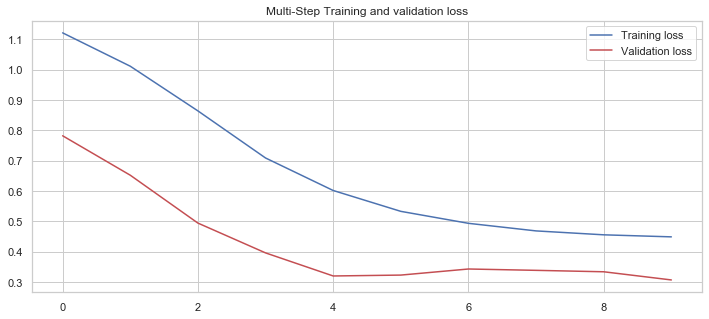

In [68]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

In [63]:
def create_time_steps(length):
    return list(range(-length, 0))

In [64]:
def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize=(12, 6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)

    plt.plot(num_in, np.array(history[:, 1]), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
                 label='Predicted Future')
    plt.legend(loc='upper left')
    plt.show()

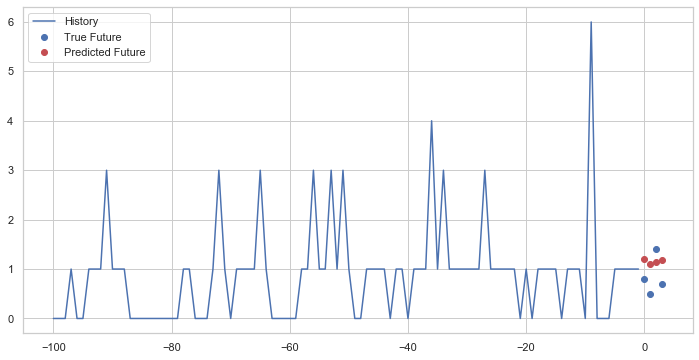

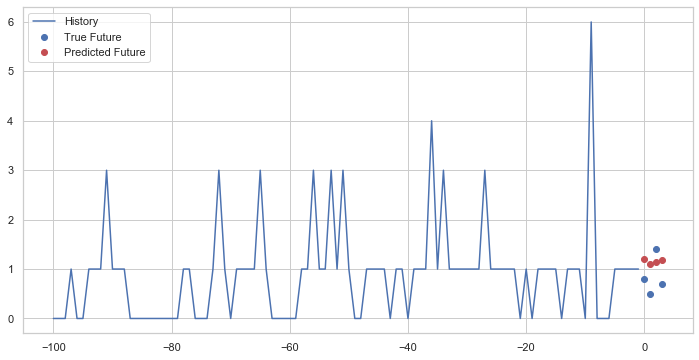

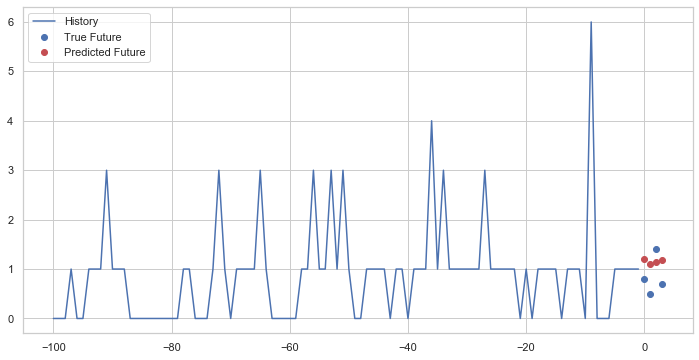

In [66]:
for x, y in val_data_multi.take(3):
    multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])

# Experiment (not part of the assignment)
## Using Echo State Networks

<font size="3">Echo state networks are a relatively new invention, it is essentially a recurrent neural network with a loosely connected hidden layer, called a ‘reservoir’ which works surprisingly well in the presence of chaotic time series. 

<font size="3">In order for the ESN principle to work, the reservoir must have the echo state property (ESP), which relates asymptotic properties of the excited reservoir dynamics to the driving signal. Intuitively, the ESP states that the reservoir will asymptotically wash out any information from initial conditions. The ESP is guaranteed for additive-sigmoid neuron reservoirs, if the reservoir weight matrix (and the leaking rates) satisfy certain algebraic conditions in terms of singular values.

In [70]:
from pyESN.pyESN import ESN 

In [75]:
data = sacramento['Daily Max 1-hour SO2 Concentration'].values

In [78]:
len(data)

243

In [90]:
n_reservoir= 500
sparsity=0.2
rand_seed=23
spectral_radius = 1.2
noise = .0005


esn = ESN(n_inputs = 1,
      n_outputs = 1, 
      n_reservoir = n_reservoir,
      sparsity=sparsity,
      random_state=rand_seed,
      spectral_radius = spectral_radius,
      noise=noise)

trainlen = 193
future = 1
futureTotal= 50
pred_tot=np.zeros(futureTotal)

for i in range(0,futureTotal,future):
    pred_training = esn.fit(np.ones(trainlen),data[i:trainlen+i])
    prediction = esn.predict(np.ones(future))
    pred_tot[i:i+future] = prediction[:,0]

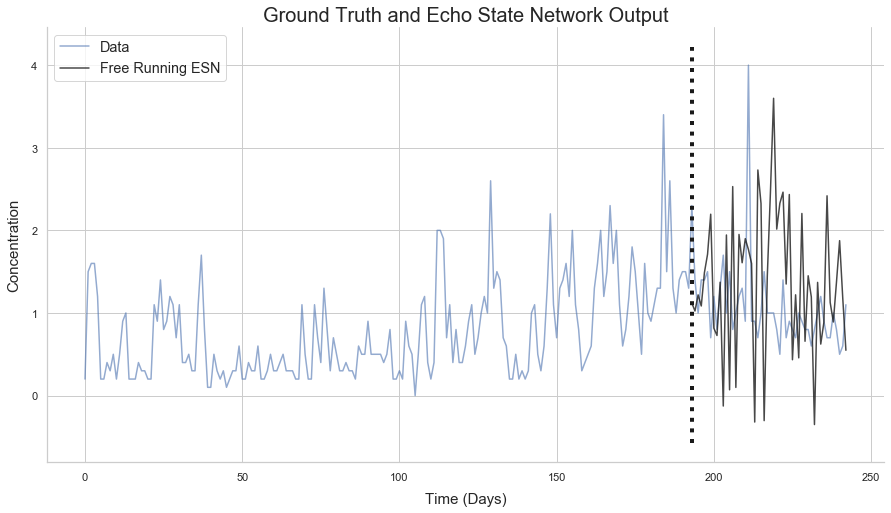

In [94]:
plt.figure(figsize=(15, 8))
plt.plot(range(0,trainlen+futureTotal),data[0:trainlen+futureTotal],'b',label="Data", alpha=0.6)
#plt.plot(range(0,trainlen),pred_training,'.g',  alpha=0.3)
plt.plot(range(trainlen,trainlen+futureTotal),pred_tot,'k',  alpha=0.8, label='Free Running ESN')

lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:', linewidth=4)

plt.title(r'Ground Truth and Echo State Network Output', fontsize=20)
plt.xlabel(r'Time (Days)', fontsize=15,labelpad=10)
plt.ylabel(r'Concentration', fontsize=15,labelpad=10)
plt.legend(fontsize='large', loc='best')
sns.despine()

<font size="3">We can surely say that this ESN identified the distribution quite well 

- <font size="3"> Echo state networks works pretty well in Stock Data, which tends to predict for the next hour or next day also called short-term prediction
- <font size="3"> ESN has a disadvantage of loosing track if predicted for longer term with relaively less data
- <font size="3"> ESN implemented with Differential Neural Computers (helps in saving long-range dependencies or past states) can prove really good for long-term predictions

---

---